In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date

def cargar_stock():
  lista_codigo = [1001,2001,3001,4001,5001]
  lista_producto = ['Pantalon','Jean','Camisa','Blusa','Short']
  lista_cantidad = [10,15,20,8,5]
  lista_precio   = [55000,70000,35000,45000,50000]
  data_stock = {"Codigo":lista_codigo,"Producto":lista_producto,"Cantidad":lista_cantidad,"Precio":lista_precio}
  df_stock = pd.DataFrame(data_stock)
  return df_stock

def mostrar_stock(df):
    print("\n------ 🛍️ STOCK DISPONIBLE 🛍️ ------")
    print(df)
    print("--------------------------------------")

    # 🔔 ALERTA DE STOCK BAJO 🔔
    print("\n🚨🔔 ALERTA DE STOCK BAJO 🔔🚨")
    stock_bajo = df[df["Cantidad"] <= 5]

    if not stock_bajo.empty:
        print("⚠️ ¡Atención! Estos productos tienen poco stock:\n")
        print(f"🧾 {'Producto':<18} | {'Cantidad':>3} unidades")
        print("-----------------------------------")
        for _, fila in stock_bajo.iterrows():
            print(f"❗ {fila['Producto']:<18}  {fila['Cantidad']:>3} unidades")
    else:
        print("✅ Todos los productos tienen stock suficiente.")


In [2]:
def mostrar_menu():
    print("""
       *** 🌷🌹 VALERIA BOUTIQUE 🌹🌷 ***
-------------------------------------------------
                 === Menú ===
*  1. Ver stock disponible                      *
*  2. Realizar una venta                        *
*  3. Ver reporte de ventas                     *
*  4. Mostrar gráfica de productos más vendidos *
*  5. Agregar o actualizar producto             *
*  6. Salir                                     *
-------------------------------------------------
""")

In [3]:
def realizar_venta(df_stock, df_ventas):
    carrito = []
    total_venta = 0
    fecha_actual = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
    df_ventas = pd.DataFrame(columns=["Fecha", "Producto", "Cantidad", "Total"])

    while True:
        print("\nProductos disponibles:")
        print(df_stock)
        print("------------------------")

        producto = input("¿Qué producto deseas comprar? (o escribe 'salir' para terminar):  ").strip().title()
        if producto.lower() == "salir":
            break

        if producto not in df_stock["Producto"].values:
            print("Producto no encontrado.")
            continue

        try:
            cantidad = int(input(f"¿Cuántos '{producto}' deseas?: "))
        except ValueError:
            print("Por favor ingresa un número válido.")
            continue

        fila = df_stock[df_stock["Producto"] == producto]
        stock_disp = int(fila["Cantidad"].values[0])
        precio = int(fila["Precio"].values[0])

        if cantidad > stock_disp:
            print("No hay suficiente stock.")
            continue

        subtotal = cantidad * precio
        total_venta += subtotal
        carrito.append((producto, cantidad, subtotal))

        df_stock.loc[df_stock["Producto"] == producto, "Cantidad"] -= cantidad

    # === Imprimir factura ===
    if carrito:
      print("\n" + "="*50)
      print("               🧾 FACTURA DE COMPRA 🧾")
      print("="*50)
      print(f"Fecha y hora: {fecha_actual}")
      print("-"*50)

      print(f"{'Producto':<15}{'Cant':>5}{'V.Unitario':>15}{'Subtotal':>15}")
      print("-"*50)
      for item in carrito:
        producto = item[0]
        cantidad = item[1]
        subtotal = item[2]
        v_unitario = subtotal / cantidad
        print(f"{producto:<15}{cantidad:>5}{v_unitario:>15,.0f}{subtotal:>15,.0f}")

      print("-"*50)
      print(f"{'TOTAL A PAGAR':<35}${total_venta:>13,.0f}")
      print("="*50)

      # Guardar ventas
      for item in carrito:
        df_ventas.loc[len(df_ventas)] = [fecha_actual, item[0], item[1], item[2]]

    return df_ventas

In [4]:
def mostrar_reporte_ventas(df_ventas):
    if df_ventas.empty:
        print("No hay ventas registradas aún.")
    else:
        print("\n=== REPORTE DE VENTAS ===")
        print(df_ventas)

In [5]:
def mostrar_grafica(df_ventas):
    if df_ventas.empty:
        print("No hay datos de ventas aún.")
        return

    resumen = df_ventas.groupby("Producto")["Cantidad"].sum()
    resumen.plot(kind="bar", title="Productos más vendidos", color="magenta")
    plt.ylabel("Cantidad Vendida")
    plt.xlabel("Producto")
    plt.grid(True)
    plt.show()

In [8]:
def agregar_o_actualizar_producto(df_stock):
    print("\n🆕 Ingreso o actualización de producto")
    codigo = int(input("Ingrese el código del producto: "))
    producto = input("Nombre del producto: ").strip().title()
    cantidad = int(input("Cantidad a ingresar: "))
    precio = int(input("Precio unitario: "))

    # ¿Ya existe?
    existe = df_stock["Producto"].str.lower().eq(producto.lower()).any()

    if existe:
        # Actualizar cantidad y precio
        df_stock.loc[df_stock["Producto"].str.lower() == producto.lower(), "Cantidad"] += cantidad
        df_stock.loc[df_stock["Producto"].str.lower() == producto.lower(), "Precio"] = precio
        print(f"🔄 Producto '{producto}' actualizado con éxito.")
    else:
        # Agregar nuevo producto
        nuevo = {"Codigo": codigo, "Producto": producto, "Cantidad": cantidad, "Precio": precio}
        df_stock.loc[len(df_stock)] = nuevo
        print(f"✅ Producto '{producto}' agregado con éxito.")


       *** 🌷🌹 VALERIA BOUTIQUE 🌹🌷 ***
-------------------------------------------------
                 === Menú ===
*  1. Ver stock disponible                      *
*  2. Realizar una venta                        *
*  3. Ver reporte de ventas                     *
*  4. Mostrar gráfica de productos más vendidos *
*  5. Agregar o actualizar producto             *
*  6. Salir                                     *
-------------------------------------------------

Elige una opción: 1

------ 🛍️ STOCK DISPONIBLE 🛍️ ------
   Codigo  Producto  Cantidad  Precio
0    1001  Pantalon        10   55000
1    2001      Jean        15   70000
2    3001    Camisa        20   35000
3    4001     Blusa         8   45000
4    5001     Short         5   50000
--------------------------------------

🚨🔔 ALERTA DE STOCK BAJO 🔔🚨
⚠️ ¡Atención! Estos productos tienen poco stock:

🧾 Producto           | Cantidad unidades
-----------------------------------
❗ Short                 5 unidades

       *** 🌷🌹 

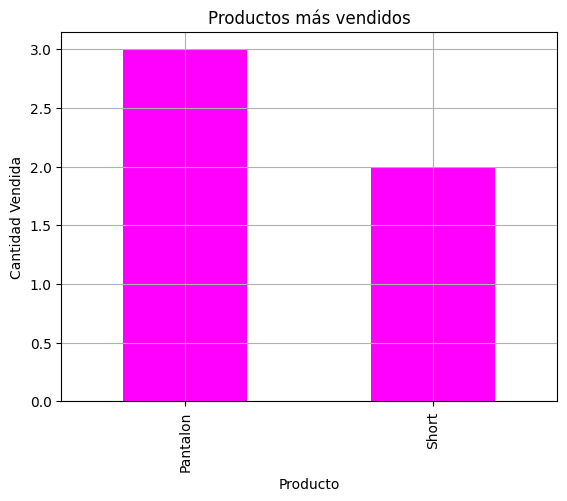


       *** 🌷🌹 VALERIA BOUTIQUE 🌹🌷 ***
-------------------------------------------------
                 === Menú ===
*  1. Ver stock disponible                      *
*  2. Realizar una venta                        *
*  3. Ver reporte de ventas                     *
*  4. Mostrar gráfica de productos más vendidos *
*  5. Agregar o actualizar producto             *
*  6. Salir                                     *
-------------------------------------------------

Elige una opción: 5

🆕 Ingreso o actualización de producto
Ingrese el código del producto: 6001
Nombre del producto: Buso
Cantidad a ingresar: 6
Precio unitario: 35000
✅ Producto 'Buso' agregado con éxito.

       *** 🌷🌹 VALERIA BOUTIQUE 🌹🌷 ***
-------------------------------------------------
                 === Menú ===
*  1. Ver stock disponible                      *
*  2. Realizar una venta                        *
*  3. Ver reporte de ventas                     *
*  4. Mostrar gráfica de productos más vendidos *
*  5.

In [9]:
df_stock = cargar_stock()
df_ventas = pd.DataFrame(columns=["Fecha", "Producto", "Cantidad", "Total"])

while True:
    mostrar_menu()
    opcion = input("Elige una opción: ")

    if opcion == "1":
        mostrar_stock(df_stock)
    elif opcion == "2":
        df_ventas = realizar_venta(df_stock, df_ventas)
    elif opcion == "3":
        mostrar_reporte_ventas(df_ventas)
    elif opcion == "4":
        mostrar_grafica(df_ventas)
    elif opcion == "5":
        agregar_o_actualizar_producto(df_stock)
    elif opcion == "6":
        print("Gracias por visitarnos. ¡Hasta pronto!")
        break
    else:
        print("Opción inválida.")